<a href="https://colab.research.google.com/github/shubhaaaa1/HousepricePrediction/blob/main/HouseRatePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [2]:
#Loading the database
house_dataset= dt.fetch_california_housing()

In [3]:
house_df= pd.DataFrame(house_dataset.data,columns= house_dataset.feature_names)
house_df['price']= house_dataset.target

In [4]:
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
house_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [6]:
house_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [7]:
house_df.shape

(20640, 9)

In [8]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
house_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

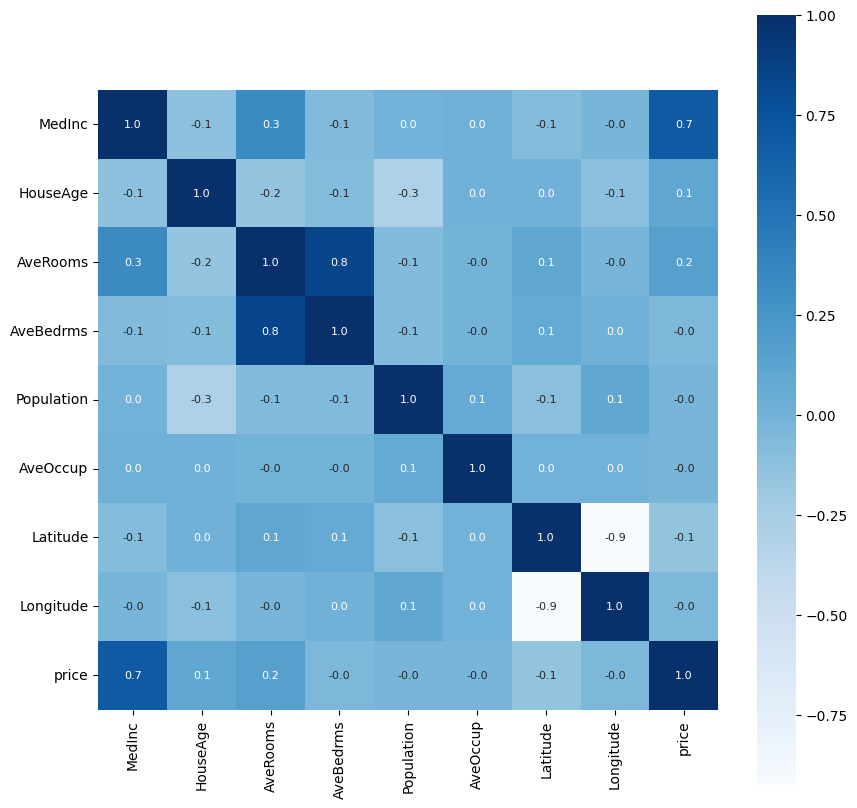

In [10]:
correlation= house_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,cmap='Blues',fmt='.1f',annot=True,annot_kws={'size':8})

In [11]:
X= house_df.drop(['price'],axis=1)
Y=house_df['price']

In [12]:
#splitting the Train and test data
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [13]:
#Model Training
model= XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
#metrics Calculation of the training and test data
test_data_pred= model.predict(X_train)
score_1= metrics.r2_score(Y_train,test_data_pred)
score_2= metrics.mean_absolute_error(Y_train,test_data_pred)

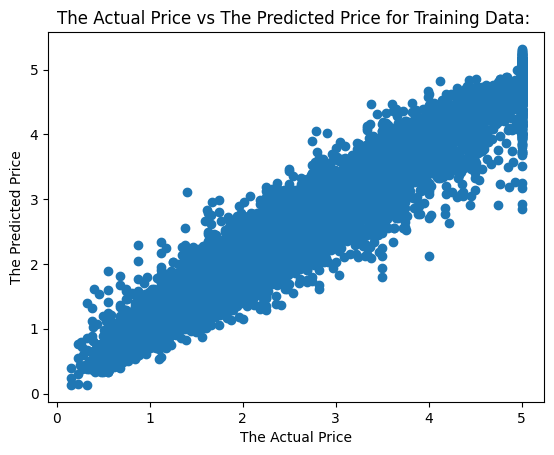

In [15]:
#Visualize the differnce btw actual price and predicted price for training
plt.scatter(Y_train,test_data_pred)
plt.xlabel('The Actual Price')
plt.ylabel('The Predicted Price')
plt.title('The Actual Price vs The Predicted Price for Training Data: ')
plt.show()

In [16]:
print(f'The R2 metrics data of training data is : {score_1}')
print(f'The Mean absolute error data of training data is : {score_2}')

The R2 metrics data of training data is : 0.943650140819218
The Mean absolute error data of training data is : 0.1933648700612105


In [17]:
test_data_pred1=model.predict(X_test)
score_11= metrics.r2_score(Y_test,test_data_pred1)
score_21= metrics.mean_absolute_error(Y_test,test_data_pred1)

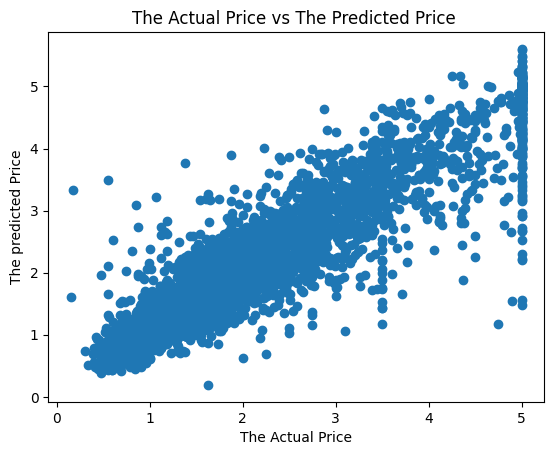

In [18]:
plt.scatter(Y_test,test_data_pred1)
plt.title('The Actual Price vs The Predicted Price ')
plt.xlabel('The Actual Price')
plt.ylabel('The predicted Price')
plt.show()

In [19]:
print(f'The first r2 metrics of the test data is : {score_11}')
print(f'The second Mean absolute metrics of the test data is : {score_21}')

The first r2 metrics of the test data is : 0.8338000331788725
The second Mean absolute metrics of the test data is : 0.3108631800268186


In [22]:
#predictive system
print("Provide me with the 8 features of the data to get predictions")
input_data=(1.5603,25,5.04,1.13,845,2.56,39.48,-121.09)
num_arr= np.asarray(input_data)
reshaped_data = num_arr.reshape(1,-1)
prediction = model.predict(reshaped_data)
print(f'Prediction of the Prices of the house is : $ {int(prediction[0]*100000)} ')

Provide me with the 8 features of the data to get predictions
Prediction of the Prices of the house is : $ 71600 


In [23]:
import pickle
pickle.dump(model,open('model.pkl','wb'))